Details: 
server_distillation_capacity: 4

server_crystallization_capacity: 4

server_packaging_product1_pt_mode: 0.5, 0.75, 1, 1.25, 1.75, 2

server_packaging_product2_pt_mode: 12, 14, 18, 20, 22, 24

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import ast
import numpy as np
import seaborn as sns

In [2]:
#Load the Excel files
files = 'output.xlsx'
data = pd.ExcelFile(files)

# Load the sheets
df_results = pd.read_excel(data, 'results')
df = pd.read_excel(data, 'q_react_length', header=None)
df.dropna(axis=1, how="all", inplace=True)
df_results.head
df.head()

,0,1,3,4,6,7,9,10,12,13,...,75,76,78,79,81,82,84,85,87,88
0,time[minutes],queue_preparation_length scenario 0,time[minutes],queue_preparation_length scenario 1,time[minutes],queue_preparation_length scenario 2,time[minutes],queue_preparation_length scenario 3,time[minutes],queue_preparation_length scenario 4,...,time[minutes],queue_preparation_length scenario 25,time[minutes],queue_preparation_length scenario 26,time[minutes],queue_preparation_length scenario 27,time[minutes],queue_preparation_length scenario 28,time[minutes],queue_preparation_length scenario 29
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,1,0,1,0,1,0,1,0,...,1,0,1,0,1,0,1,0,1,0
3,2,0,2,0,2,0,2,0,2,0,...,2,0,2,0,2,0,2,0,2,0
4,3,0,3,0,3,0,3,0,3,0,...,3,0,3,0,3,0,3,0,3,0


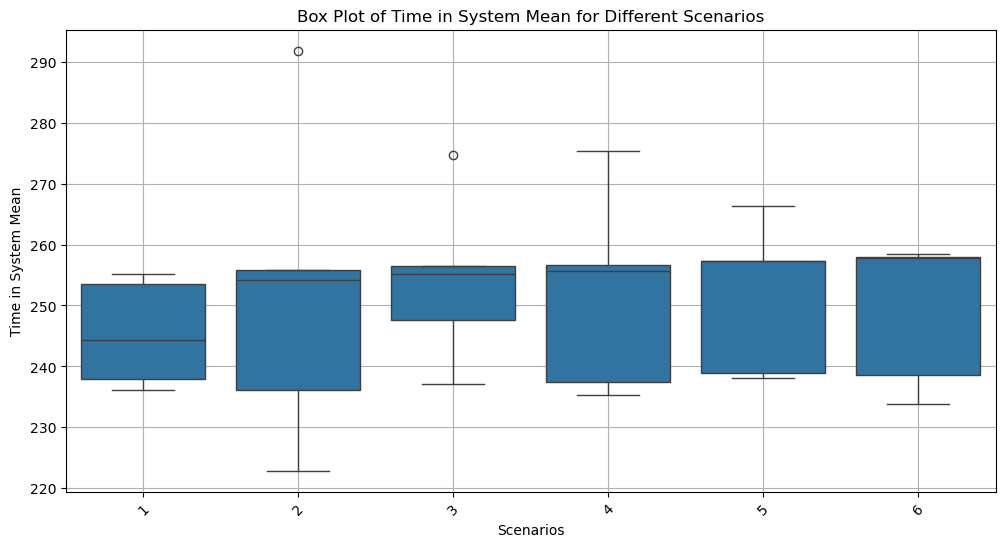

In [3]:
# Create the box plot for time_in_system_mean per Scenario

plt.figure(figsize=(12, 6))




# Use the boxplot function from seaborn

sns.boxplot(x='scenario', y='time_in_system_mean', data=df_results)




# Title and labels

plt.title('Box Plot of Time in System Mean for Different Scenarios')

plt.xlabel('Scenarios')

plt.ylabel('Time in System Mean')

plt.xticks(rotation=45)

plt.grid()




# Show the plot

plt.show()

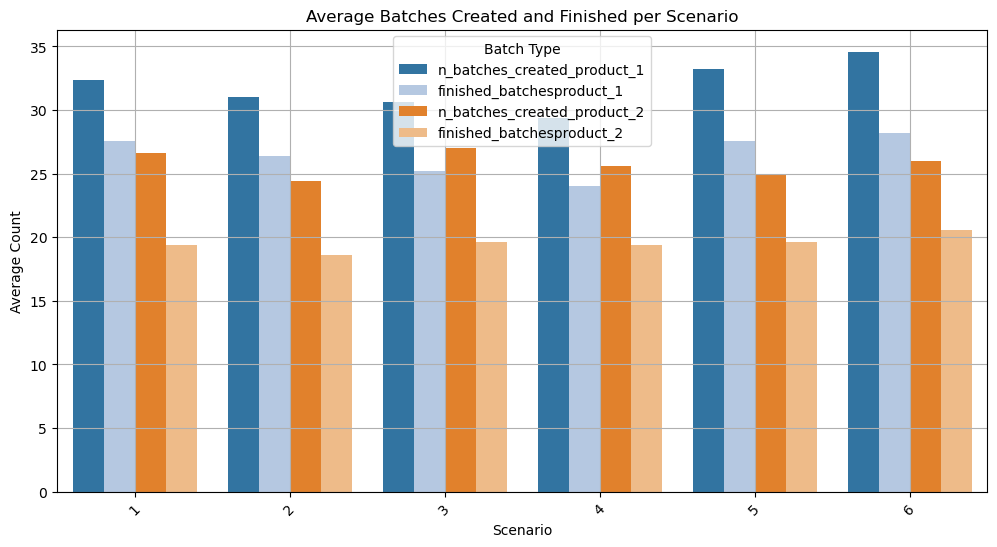

In [4]:
# Step 1: Calculate the Means

mean_batches = df_results.groupby('scenario').agg({

    'n_batches_created_product_1': 'mean',

    'finished_batchesproduct_1': 'mean',

    'n_batches_created_product_2': 'mean',

    'finished_batchesproduct_2': 'mean'

}).reset_index()




# Step 2: Reshape the Data for Plotting

mean_batches_melted = mean_batches.melt(id_vars='scenario', 

                                          value_vars=['n_batches_created_product_1', 'finished_batchesproduct_1',
 

                                                      'n_batches_created_product_2', 'finished_batchesproduct_2'],

                                          var_name='Batch Type', 

                                          value_name='Count')




# Step 3: Create the Bar Chart with Custom Colors

plt.figure(figsize=(12, 6))




# Define a custom color palette

palette = {

    'n_batches_created_product_1': '#1f77b4',  # Blue for created Product 1

    'finished_batchesproduct_1': '#aec7e8',     # Light blue for finished Product 1

    'n_batches_created_product_2': '#ff7f0e',   # Orange for created Product 2

    'finished_batchesproduct_2': '#ffbb78'       # Light orange for finished Product 2

}




# Create the bar plot

sns.barplot(data=mean_batches_melted, x='scenario', y='Count', hue='Batch Type', palette=palette)




# Title and labels

plt.title('Average Batches Created and Finished per Scenario')

plt.xlabel('Scenario')

plt.ylabel('Average Count')

plt.xticks(rotation=45)

plt.legend(title='Batch Type')

plt.grid()